In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.


In [3]:
df = pd.read_csv('Complete analysis on ASD.csv')

In [4]:
df.head()

,Unnamed: 0,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Mom_age,Qchat-10-Score,Gender,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,traits,age-group
0,0,0,0,0,0,0,0,1,1,0,1,28,3,f,Middle Eastern,1,0,family member,0,Toddlers
1,1,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,1,0,family member,1,Toddlers
2,2,1,0,0,0,0,0,1,1,0,1,36,4,m,Middle Eastern,1,0,family member,1,Toddlers
3,3,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic or Latino,0,0,family member,1,Toddlers
4,4,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,0,1,family member,1,Toddlers


We shall build three models using Logistic Regression,Random Forrest Classifier and K-NN Classifier .

In [5]:
within24_36= pd.get_dummies(df['Mom_age']>24,drop_first=True)
within0_12 = pd.get_dummies(df['Mom_age']<13,drop_first=True)
male=pd.get_dummies(df['Gender'],drop_first=True)
age_group=pd.get_dummies(df['age-group'],drop_first=True)
ethnics=pd.get_dummies(df['Ethnicity'],drop_first=True)
jaundice=pd.get_dummies(df['Jaundice'],drop_first=True)
ASD_genes=pd.get_dummies(df['Family_mem_with_ASD'],drop_first=True)
ASD_traits=pd.get_dummies(df['traits'],drop_first=True)

In [6]:
df["Ethnicity"] = df['Ethnicity'].replace('Native Indian', 'Others')

In [7]:
df["Ethnicity"] = df['Ethnicity'].replace('Turkish', 'Others')

In [8]:
data = pd.concat([within24_36,within0_12,male,age_group,ethnics,jaundice,ASD_genes,ASD_traits],axis=1)

In [9]:
data.columns = ['within24_36','within0_12','male','toddlers','adolescents','adults','White European','Middle Eastern','Hispanic or Latino','Black','Asian','Pacifica','Others','jaundice','ASD_genes','ASD_traits']

In [10]:
data.head()

,within24_36,within0_12,male,toddlers,adolescents,adults,White European,Middle Eastern,Hispanic or Latino,Black,Asian,Pacifica,Others,jaundice,ASD_genes,ASD_traits
0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0
1,1,0,1,0,1,0,0,0,0,0,0,0,1,1,0,1
2,1,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1
3,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1
4,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1


In [11]:
data

,within24_36,within0_12,male,toddlers,adolescents,adults,White European,Middle Eastern,Hispanic or Latino,Black,Asian,Pacifica,Others,jaundice,ASD_genes,ASD_traits
0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0
1,1,0,1,0,1,0,0,0,0,0,0,0,1,1,0,1
2,1,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1
3,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1
4,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1402,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1403,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0
1404,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1405,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0


1. Logistic Regression Model Fitting

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X= data.iloc[:,:-1]
y= data.iloc[:,-1]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=101)

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

 Predicting the test set results and calculating the accuracy

In [15]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.80


 Confusion Matrix

In [16]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[111  38]
 [ 46 228]]


In [17]:
111 + 228 + 38 + 46

423

In [18]:
111+228


339

In [19]:
339/423

0.8014184397163121

The result is telling us that our analysis has predicted 80% of the results correctly

 Compute precision, recall, F-measure and support
 
 To quote from Scikit Learn:
 
 The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false 
 positives. The precision is intuitively the ability of the classifier to not label a sample as positive if it is 
 negative.
 
 The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false 
 negatives. The recall is intuitively the ability of the classifier to find all the positive samples.
 
 The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score 
 reaches its best value at 1 and worst score at 0.
 
 The F-beta score weights the recall more than the precision by a factor of beta. beta = 1.0 means recall and 
 precision are equally important.
 
The support is the number of occurrences of each class in y_test.


In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.74      0.73       149
           1       0.86      0.83      0.84       274

    accuracy                           0.80       423
   macro avg       0.78      0.79      0.78       423
weighted avg       0.80      0.80      0.80       423



 Interpretation:
 So based on the Logistic Regression model on above dataset, if anyone provides person's age,gender,ethnicity,
 jaundice while birth? and any relative having ASD traits?, the model can predict either the person has ASD 
 or not with precision of 80%

2. Random Forest Classifier

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
rfc= RandomForestClassifier(n_estimators=500)
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=500)

In [23]:
pred_rfc= rfc.predict(X_test)


In [24]:
from sklearn.metrics import confusion_matrix, classification_report

In [25]:
print(confusion_matrix(y_test,pred_rfc))

[[ 94  55]
 [ 39 235]]


In [1]:
(94+235)/(94+55+39+235)

0.7777777777777778

In [27]:
print(classification_report(y_test,pred_rfc))

              precision    recall  f1-score   support

           0       0.71      0.63      0.67       149
           1       0.81      0.86      0.83       274

    accuracy                           0.78       423
   macro avg       0.76      0.74      0.75       423
weighted avg       0.77      0.78      0.77       423



Interpretation: So based on the Random Forrest Classifier model on above dataset, if anyone provides person's age,gender,ethnicity, jaundice while birth? and any relative having ASD traits?, the model can predict either the person has ASD or not with precision of 78%

3. KNN Classifier

In [28]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

In [29]:
scaler.fit(X)
scaled_features = scaler.transform(X)

In [30]:
X_scaled = pd.DataFrame(scaled_features,columns=X.columns)
X_scaled.head()

,within24_36,within0_12,male,toddlers,adolescents,adults,White European,Middle Eastern,Hispanic or Latino,Black,Asian,Pacifica,Others,jaundice,ASD_genes
0,0.478352,-0.166606,-1.357359,-0.541478,0.841145,-0.240613,-0.256728,2.538591,-0.046225,-0.319063,-0.103807,-0.059719,-0.724139,1.954097,-0.423532
1,0.478352,-0.166606,0.736725,-0.541478,0.841145,-0.240613,-0.256728,-0.393919,-0.046225,-0.319063,-0.103807,-0.059719,1.380951,1.954097,-0.423532
2,0.478352,-0.166606,0.736725,-0.541478,0.841145,-0.240613,-0.256728,2.538591,-0.046225,-0.319063,-0.103807,-0.059719,-0.724139,1.954097,-0.423532
3,-2.090509,-0.166606,0.736725,-0.541478,0.841145,-0.240613,3.895178,-0.393919,-0.046225,-0.319063,-0.103807,-0.059719,-0.724139,-0.511745,-0.423532
4,-2.090509,-0.166606,-1.357359,-0.541478,0.841145,-0.240613,-0.256728,-0.393919,-0.046225,-0.319063,-0.103807,-0.059719,1.380951,-0.511745,2.361094


In [31]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=101)

In [32]:
from sklearn.neighbors import KNeighborsClassifier
error_rate =[]

for i in range (1,50):
    knn= KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i= knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

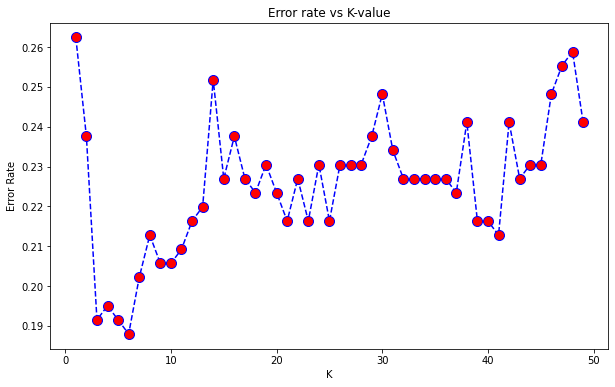

In [33]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error rate vs K-value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [34]:
knn= KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=11)

In [35]:
pred_knn=knn.predict(X_test)


In [36]:
confusion_matrix= confusion_matrix(y_test, pred_knn)
print(confusion_matrix)

[[ 59  38]
 [ 21 164]]


In [37]:
(59+164)/(59+38+21+164)

0.7907801418439716

In [38]:
print(classification_report(y_test,pred_knn))

              precision    recall  f1-score   support

           0       0.74      0.61      0.67        97
           1       0.81      0.89      0.85       185

    accuracy                           0.79       282
   macro avg       0.77      0.75      0.76       282
weighted avg       0.79      0.79      0.79       282



Interpretation: So based on the K - Nearest Neighbour Classifier model on above dataset, if anyone provides person's age,gender,ethnicity, jaundice while birth? and any relative having ASD traits?, the model can predict either the person has ASD or not with precision of 79%